In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


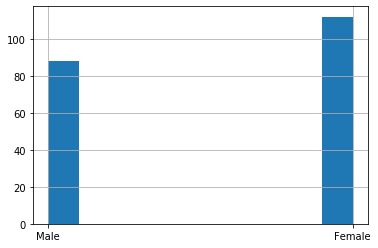

In [7]:
data['Genre'].hist()

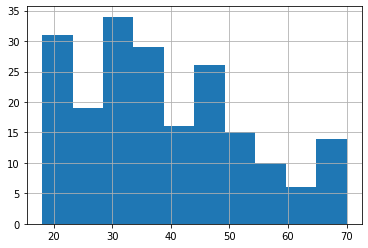

In [8]:
data['Age'].hist()

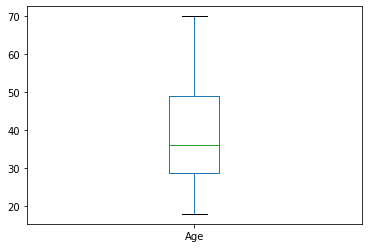

skewnessnya sebesar  0.48556885096681657


In [18]:
data['Age'].plot(kind='box')
plt.show()
print('skewnessnya sebesar ',data['Age'].skew())

skewnessnya sebesar  0.3218425498619055


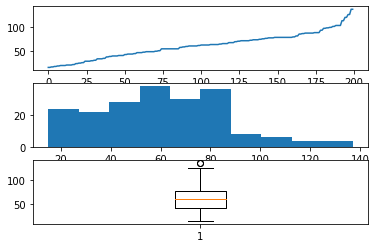

In [44]:
fig, (ax1,ax2,ax3)= plt.subplots(3)
ax1.plot(data['Annual Income (k$)'])
ax2.hist(data['Annual Income (k$)'])
ax3.boxplot(data['Annual Income (k$)'])
print('skewnessnya sebesar ',data['Annual Income (k$)'].skew())

skewnessnya sebesar  -0.047220201374263374


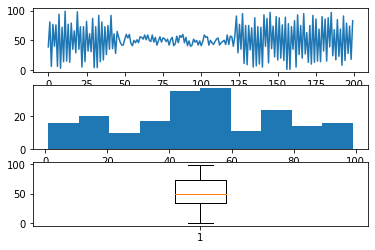

In [43]:
fig, (ax1,ax2,ax3)= plt.subplots(3)
ax1.plot(data['Spending Score (1-100)'])
ax2.hist(data['Spending Score (1-100)'])
ax3.boxplot(data['Spending Score (1-100)'])
print('skewnessnya sebesar ',data['Spending Score (1-100)'].skew())

In [48]:
# Preprocessing
data['Genre']=data['Genre'].map({'Female':0,'Male':1})

In [49]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


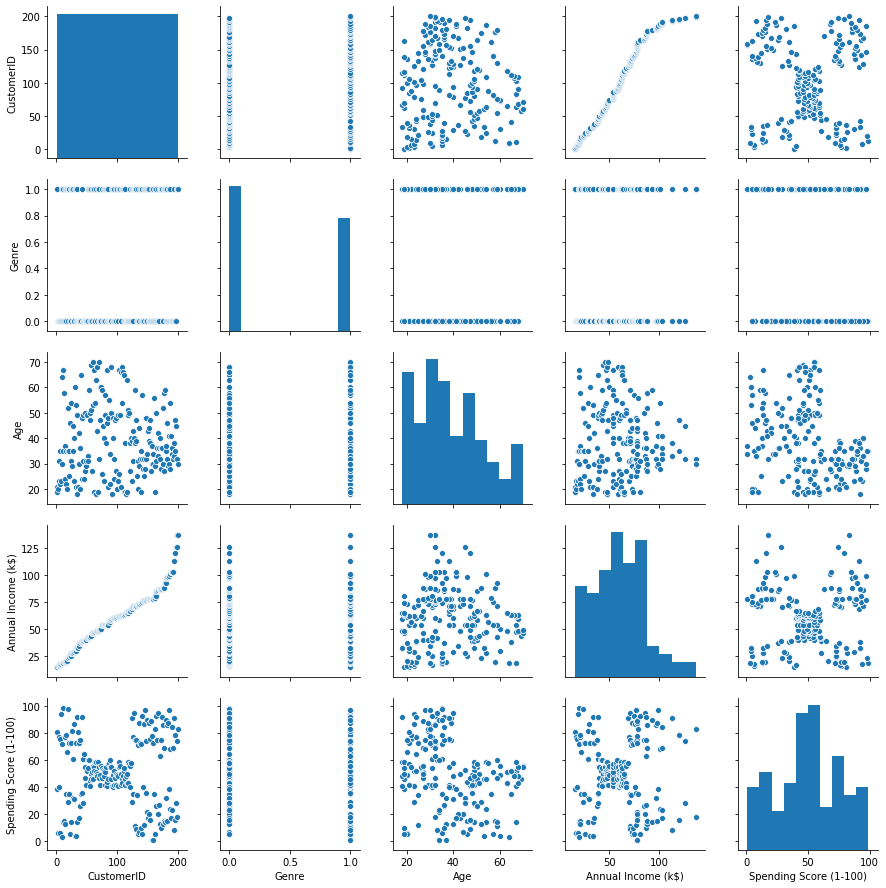

In [50]:
sns.pairplot(data)

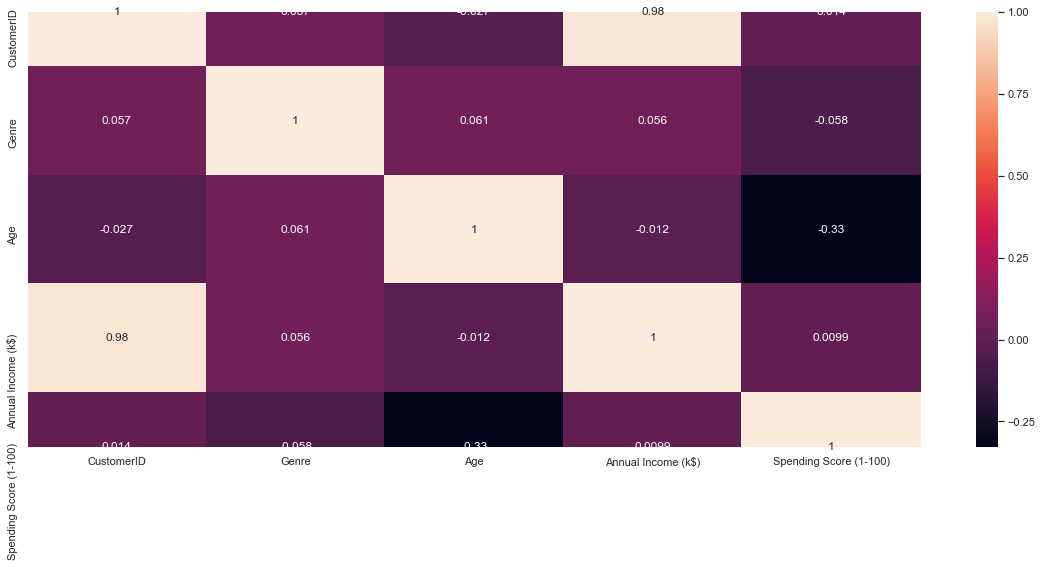

In [51]:
sns.set(rc={'figure.figsize':(20,8)});
sns.heatmap(data.corr(), annot=True)
plt.show()

## Modeling

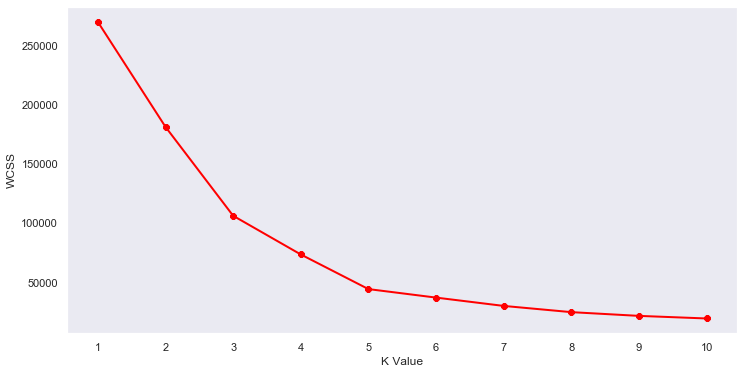

In [56]:
#Elbow Method
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,3:5])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [58]:
feature=data.iloc[:,3:5]

In [60]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(feature)

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


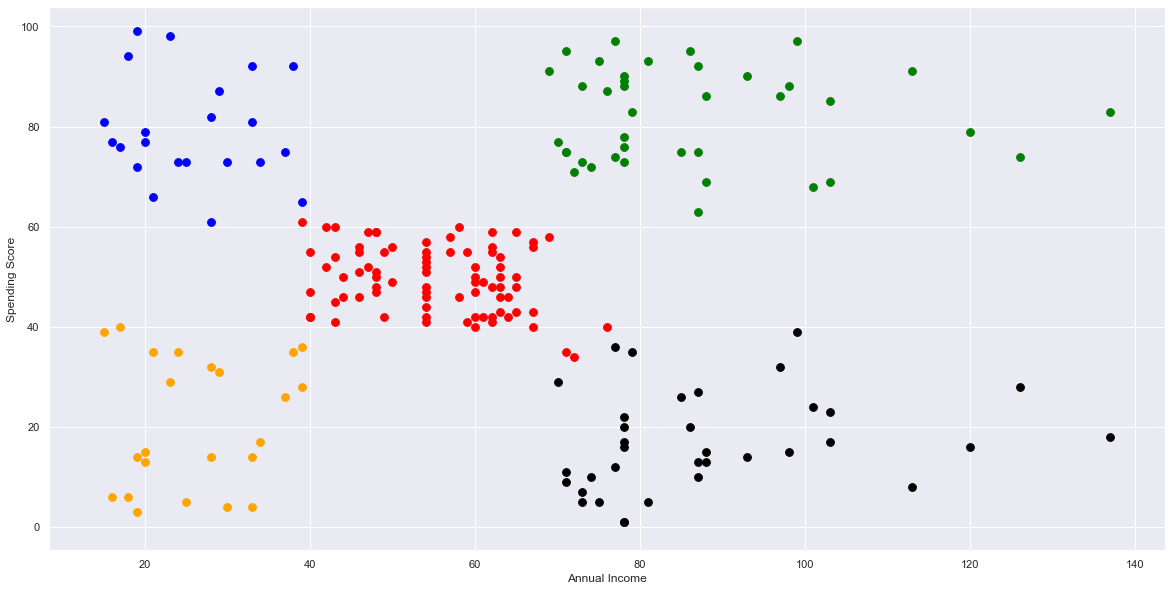

In [63]:
feature["label"] = y_kmeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
plt.scatter(feature['Annual Income (k$)'][feature.label == 0], feature['Spending Score (1-100)'][feature.label == 0],  c='blue', s=60)
plt.scatter(feature['Annual Income (k$)'][feature.label == 1], feature['Spending Score (1-100)'][feature.label == 1],  c='red', s=60)
plt.scatter(feature['Annual Income (k$)'][feature.label == 2], feature['Spending Score (1-100)'][feature.label == 2],  c='green', s=60)
plt.scatter(feature['Annual Income (k$)'][feature.label == 3], feature['Spending Score (1-100)'][feature.label == 3],  c='orange', s=60)
plt.scatter(feature['Annual Income (k$)'][feature.label == 4], feature['Spending Score (1-100)'][feature.label == 4],  c='black', s=60)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [64]:
# Shilouette Score (Evaluation)

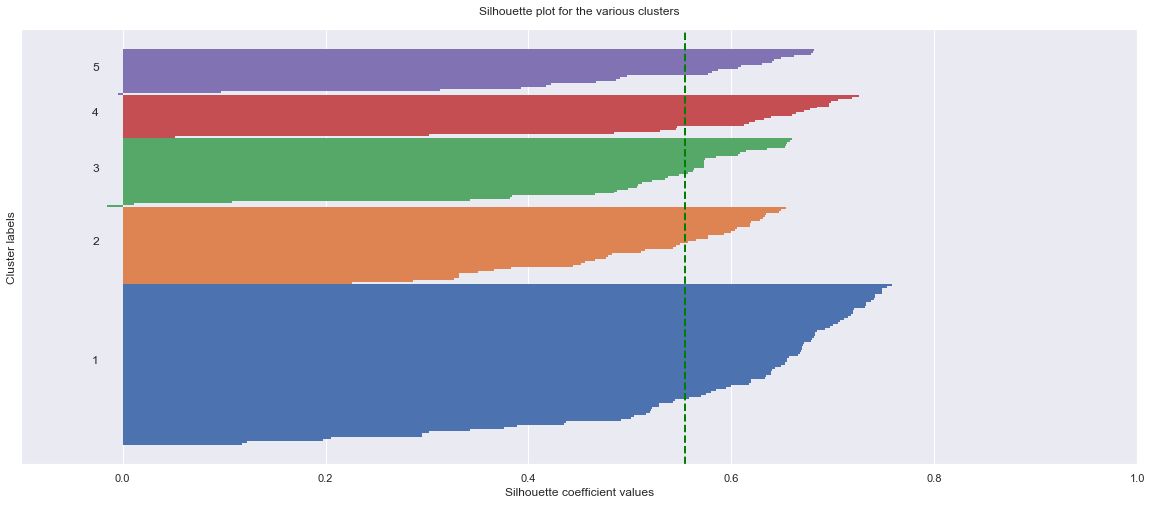

<Figure size 1440x720 with 0 Axes>

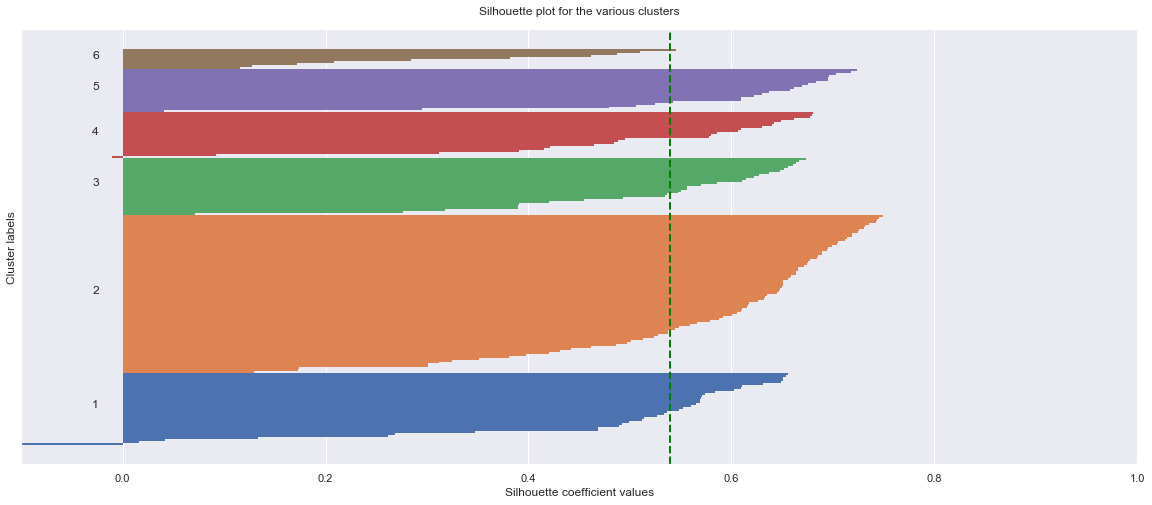

<Figure size 1440x720 with 0 Axes>

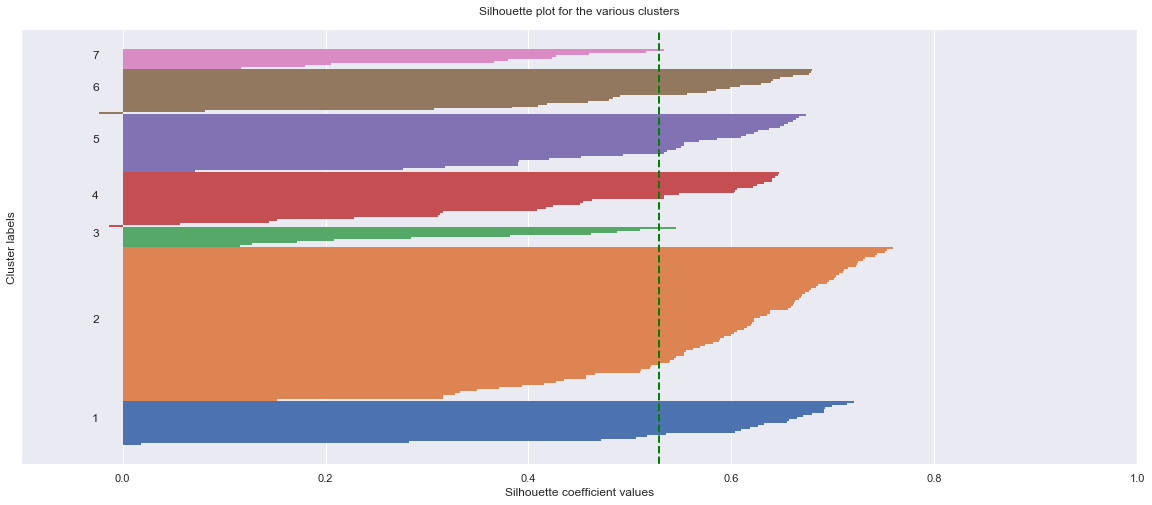

<Figure size 1440x720 with 0 Axes>

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([5, 6, 7]):
    
    fig, ax1 = plt.subplots()
    fig = plt.figure(figsize=(20,10))
    
    
    # Run the Kmeans algorithm
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(feature)
    centroids = kmeans.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(feature, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);


In [69]:
# Clustering with several K

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


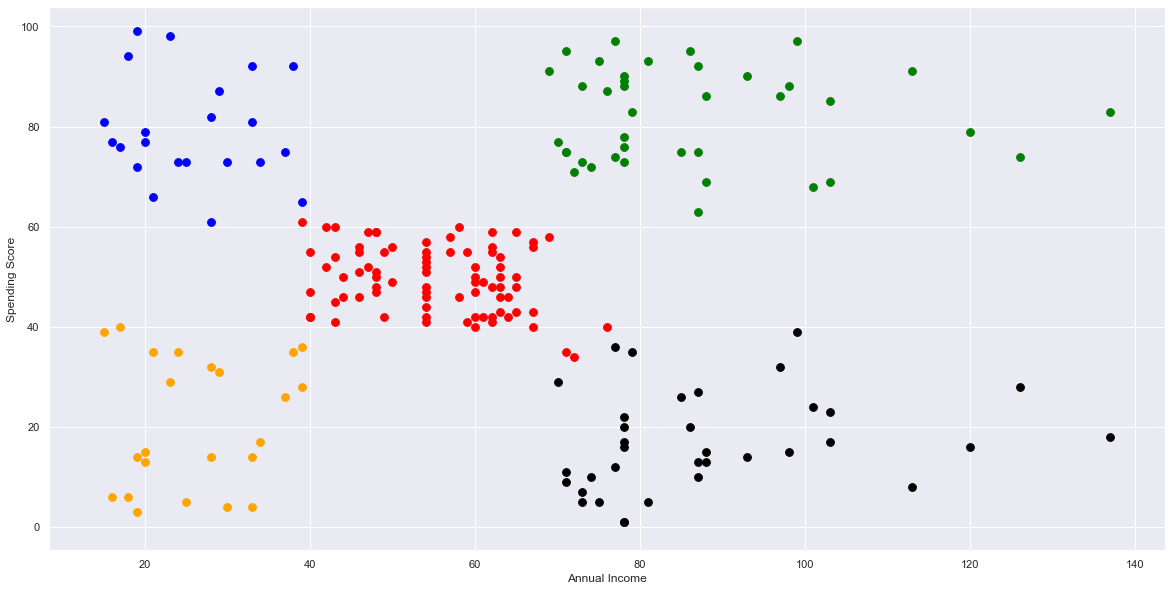

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


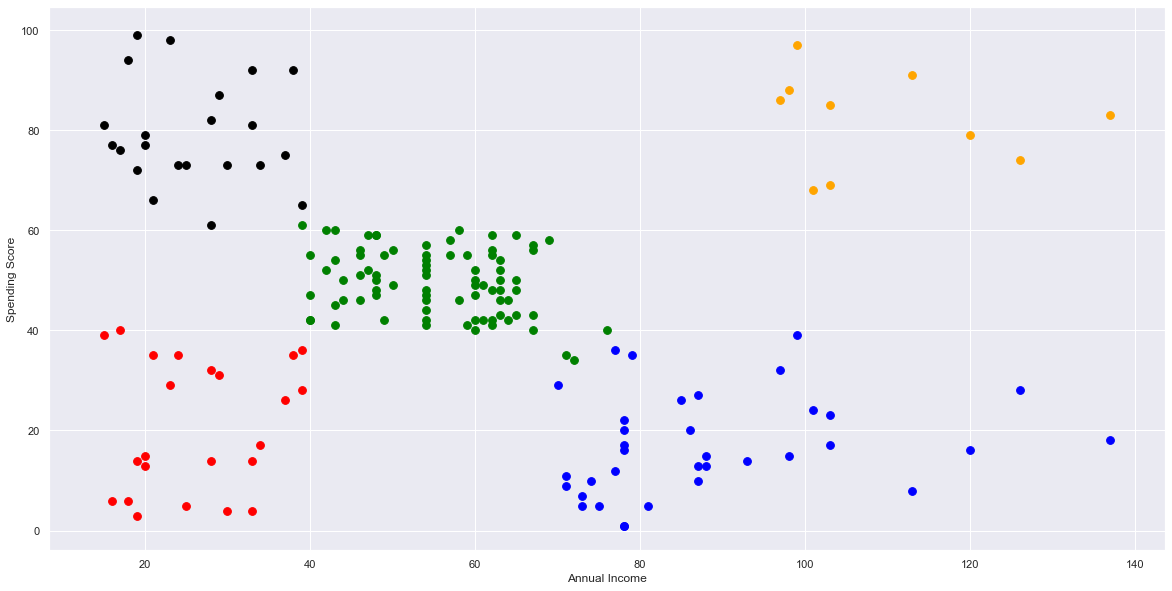

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


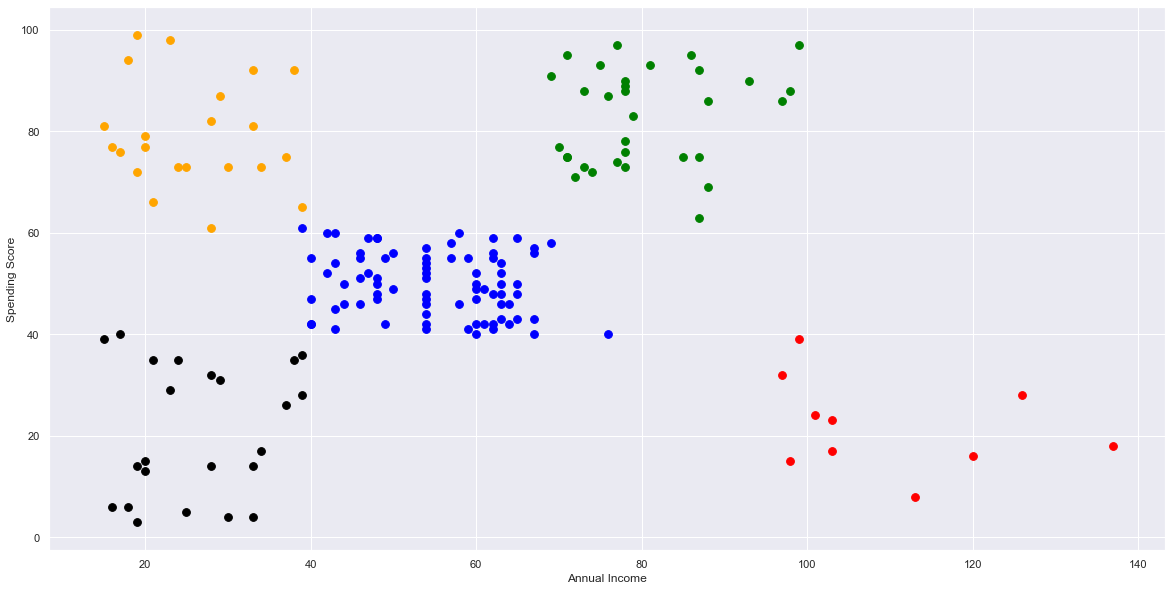

In [70]:
for i, k in enumerate([5,6,7]):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(feature)
    feature["label"] = y_kmeans

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
 

    fig = plt.figure(figsize=(20,10))
    plt.scatter(feature['Annual Income (k$)'][feature.label == 0], feature['Spending Score (1-100)'][feature.label == 0],  c='blue', s=60)
    plt.scatter(feature['Annual Income (k$)'][feature.label == 1], feature['Spending Score (1-100)'][feature.label == 1],  c='red', s=60)
    plt.scatter(feature['Annual Income (k$)'][feature.label == 2], feature['Spending Score (1-100)'][feature.label == 2],  c='green', s=60)
    plt.scatter(feature['Annual Income (k$)'][feature.label == 3], feature['Spending Score (1-100)'][feature.label == 3],  c='orange', s=60)
    plt.scatter(feature['Annual Income (k$)'][feature.label == 4], feature['Spending Score (1-100)'][feature.label == 4],  c='black', s=60)
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.show()